In [ ]:
!nvidia-smi

Thu Nov 30 20:16:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics==8.0.209

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 8.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
#!yolo mode=checks
!yolo checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kquzzAfacTuMrR89qIUC")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(4).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:11<00:00, 4305.06it/s]


In [ ]:
#second
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kquzzAfacTuMrR89qIUC")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.209, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to License-Plate-Recognition-3 in yolov8:: 100%|██████████| 48496/48496 [00:11<00:00, 4330.90it/s]


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#%cd gdrive/My Drive/CIS530_Project
!cp /content/gdrive/MyDrive/CIS530_Project/license_plate_detector.pt /content

Mounted at /content/gdrive


In [ ]:
#@title Train
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=5 batch_size=16 imgsz=640 #resume=True yolov8x.pt

New https://pypi.org/project/ultralytics/8.0.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Recognition-3/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fal

In [ ]:
!cp runs/detect/train/weights/best.pt /content/gdrive/MyDrive/CIS530_Project

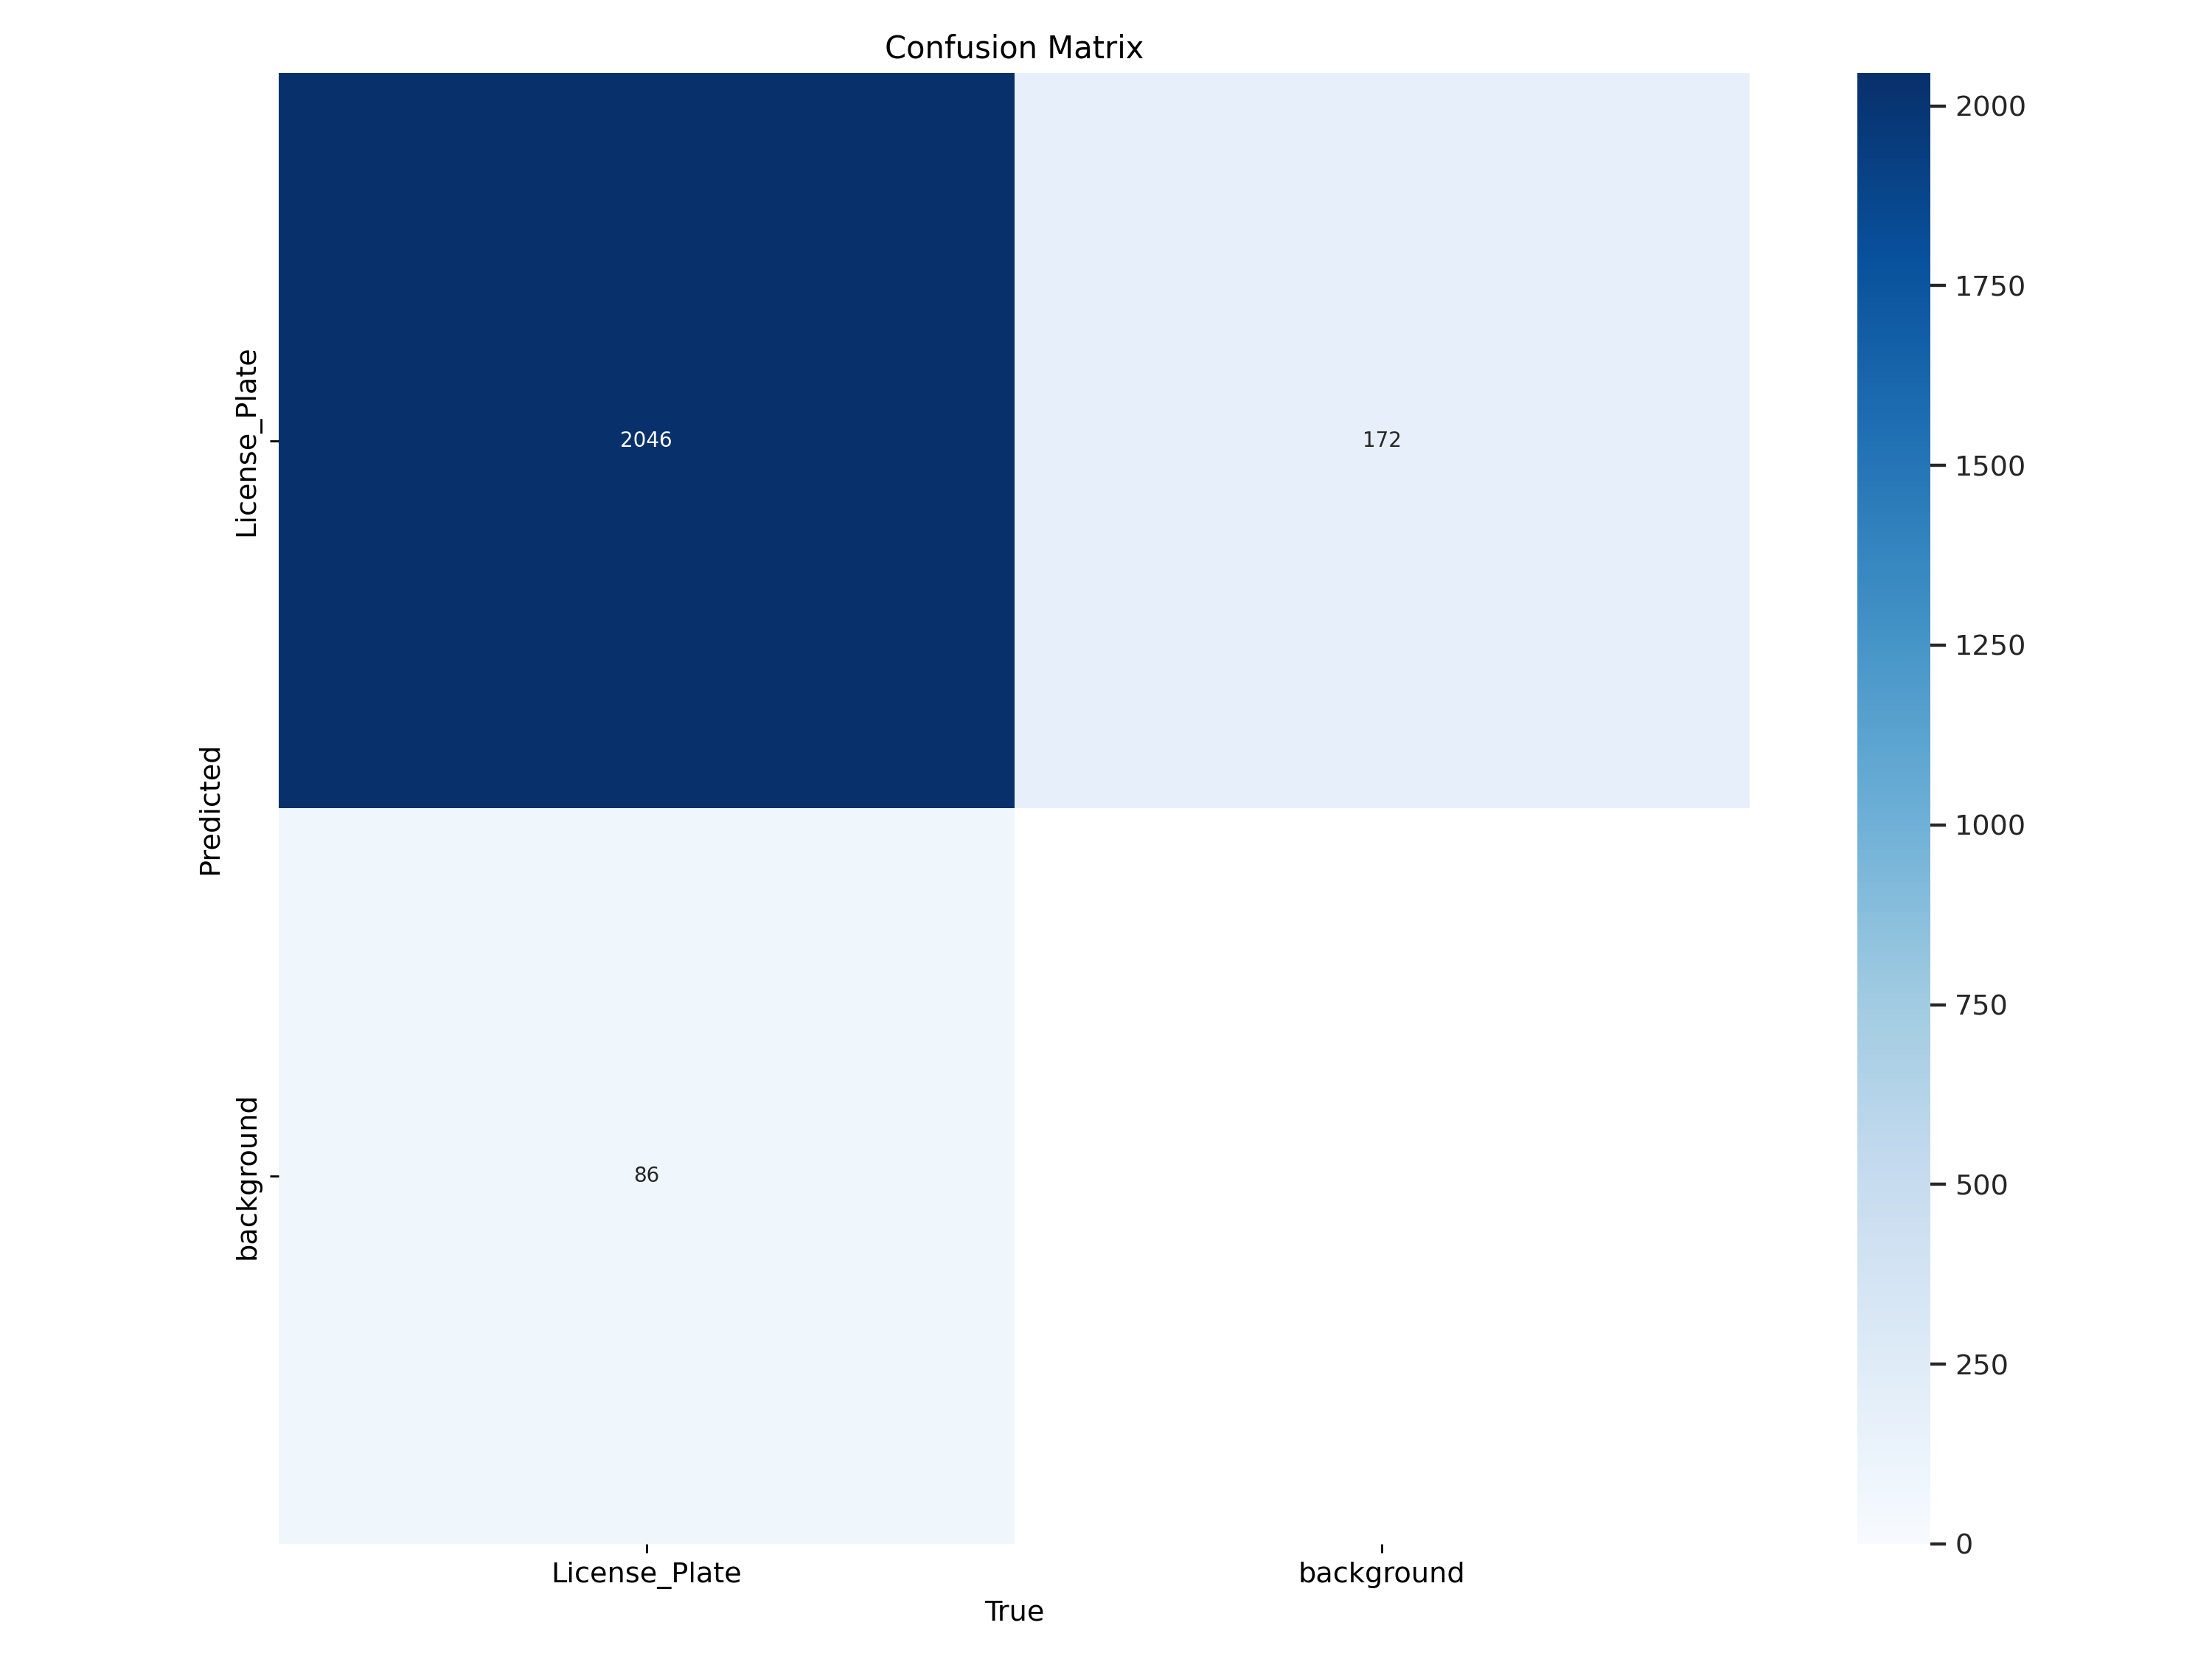

In [ ]:
Image(filename=f'/content/gdrive/MyDrive/CIS530_Project/runs/detect/train/confusion_matrix.png', width=600)

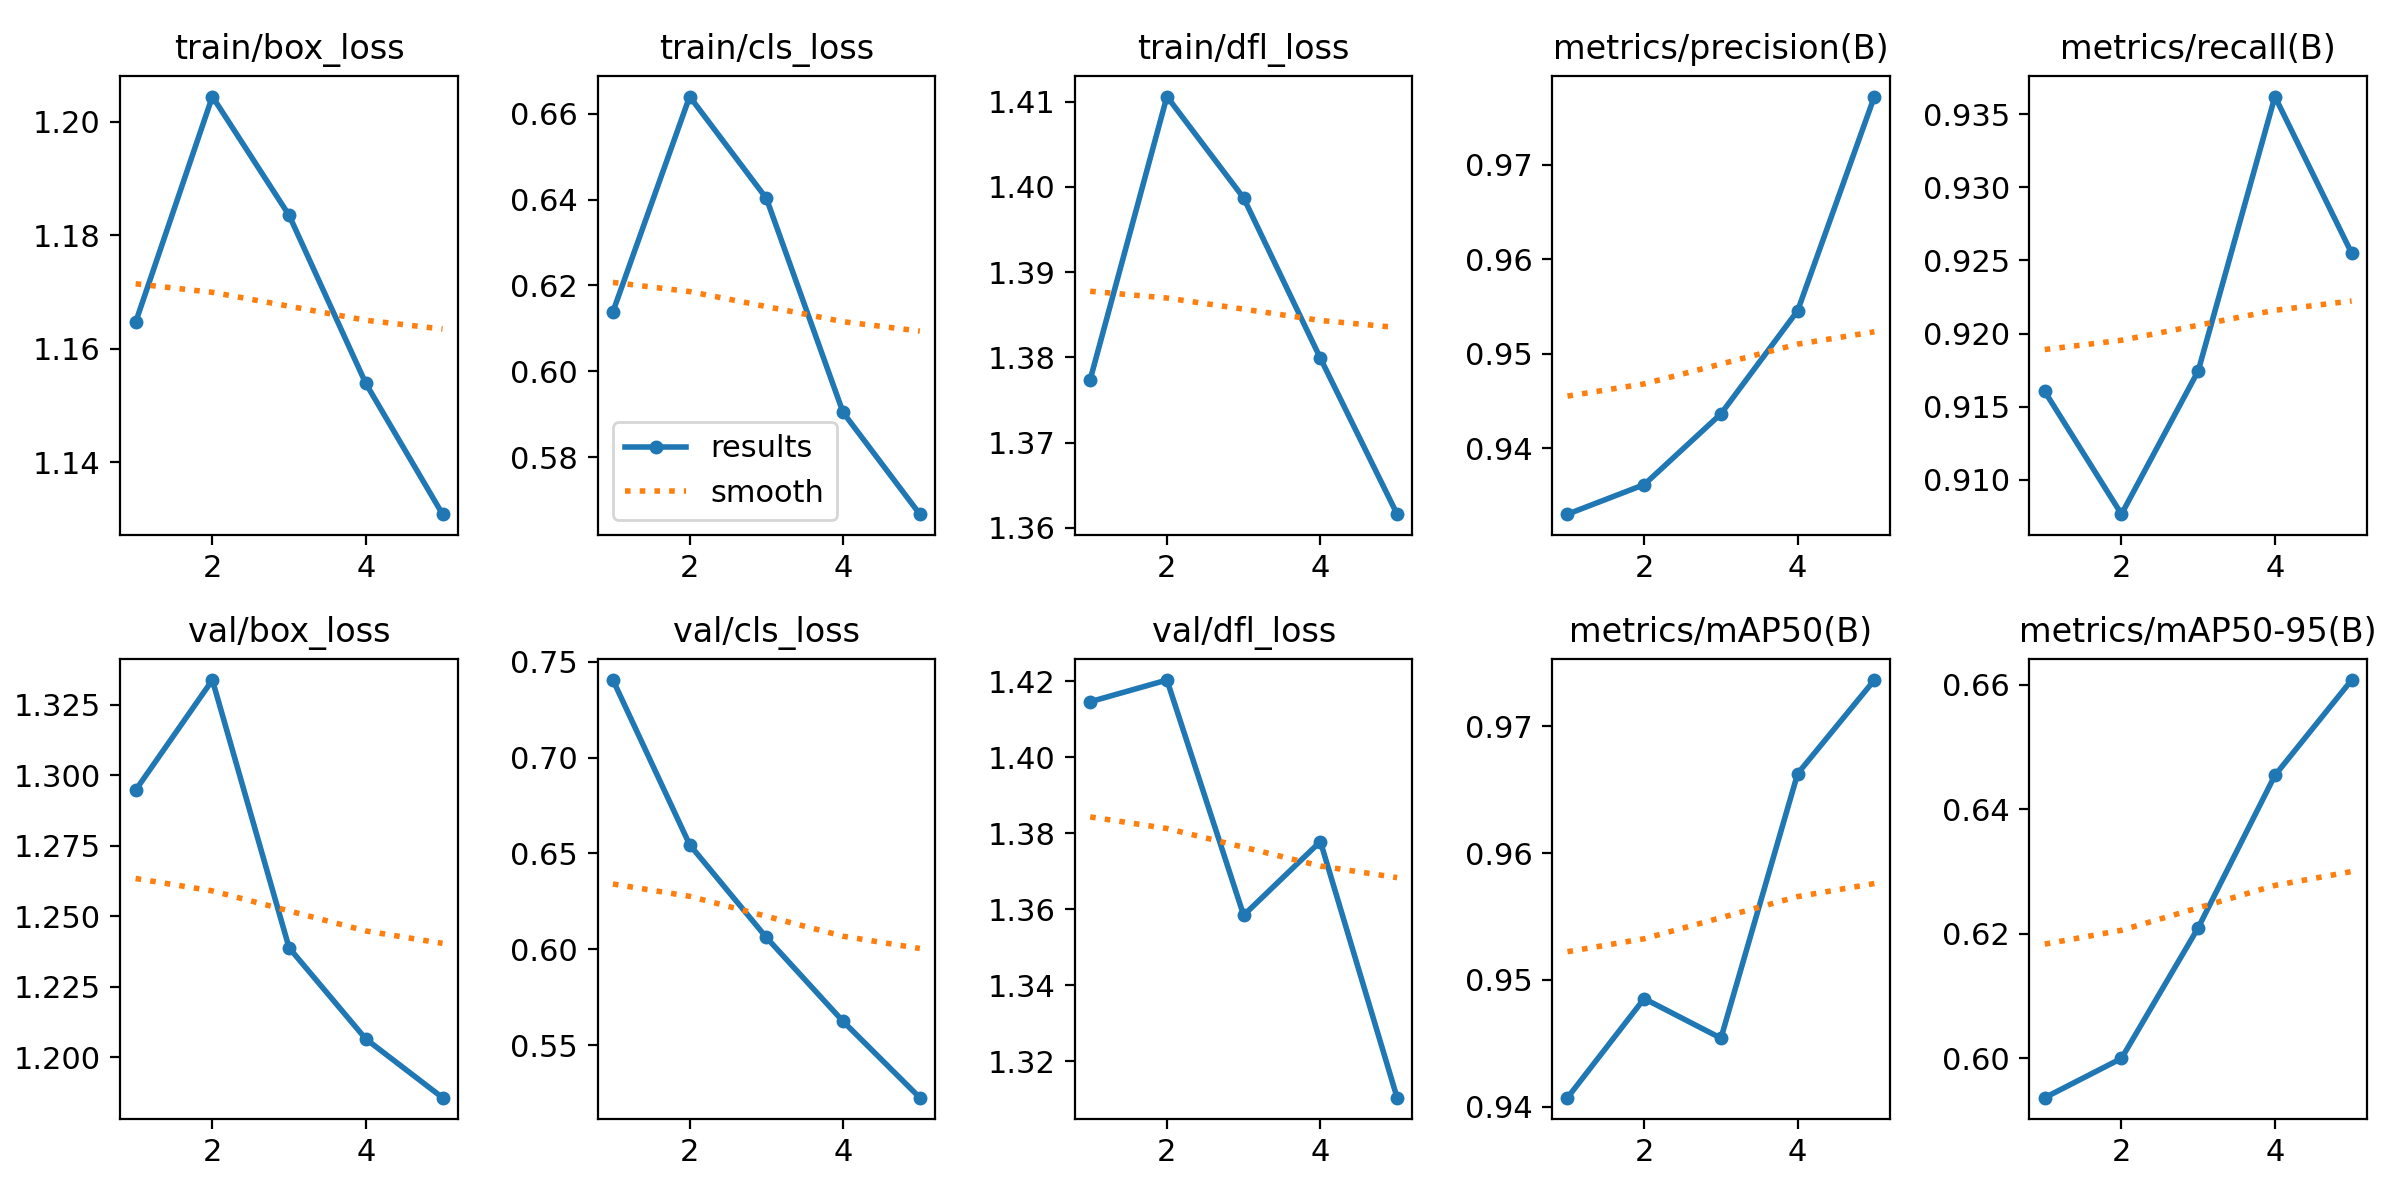

In [ ]:
Image(filename=f'/content/gdrive/MyDrive/CIS530_Project/runs/detect/train/results.png', width=600)

/content/License-Plate-Recognition-4

In [ ]:
!cp /content/drive/MyDrive/CIS530_Project/license_plate_detector.pt /content

In [ ]:
!cp /content/drive/MyDrive/CIS530_Project/n2.pt /content

In [ ]:
!cp /content/drive/MyDrive/CIS530_Project/v8x_dataset1.pt /content

In [ ]:
#@title Validation
!yolo task=detect mode=val model=v8x_dataset1.pt data={dataset.location}/data.yaml save_json=True

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
100% 755k/755k [00:00<00:00, 15.3MB/s]
val: Scanning /content/License-Plate-Recognition-4/valid/labels... 2046 images, 3 backgrounds, 0 corrupt: 100% 2046/2046 [00:00<00:00, 2307.06it/s]
val: New cache created: /content/License-Plate-Recognition-4/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 128/128 [02:13<00:00,  1.05s/it]
                   all       2046       2132      0.959      0.933      0.968      0.647
Speed: 0.4ms preprocess, 59.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#@title Prediction
!yolo task=detect mode=predict model=n2.pt conf=0.5 source={dataset.location}/test/images save_conf=True save_txt=True

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1019 /content/License-Plate-Recognition-4/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 9.7ms
image 2/1019 /content/License-Plate-Recognition-4/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 7.3ms
image 3/1019 /content/License-Plate-Recognition-4/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 1 License_Plate, 7.3ms
image 4/1019 /content/License-Plate-Recognition-4/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 1 License_Plate, 7.2ms
image 5/1019 /content/License-Plate-Recognition-4/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 1 License_Plate, 7.2ms
image 6/1019 /content/License-Plate-Recognition-4/test/i

In [ ]:
#@title Save confident value by Predict mode
import os
import csv

# Define the directory where the files are located
folder_path = 'runs/detect/predict3/labels'  # Your folder path

# Prepare to write to a CSV file
output_csv = '/content/runs/init.csv'  # Your desired output file path

# Initialize a list to store the averages
average_sixth_values = []

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Assuming the files are .txt files
        file_path = os.path.join(folder_path, filename)
        sixth_values = []  # List to store sixth values for this file

        with open(file_path, 'r') as file:
            for line in file:
                parts = line.strip().split()  # Splitting each line into parts
                if len(parts) >= 6:  # Ensure there are at least 6 values in the line
                    sixth_values.append(float(parts[5]))  # Add the sixth value to the list

        # Calculate average if the list is not empty
        if sixth_values:
            average_value = sum(sixth_values) / len(sixth_values)
            average_sixth_values.append(average_value)

# Write the averages to a CSV file
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for value in average_sixth_values:
        csvwriter.writerow([value])  # Write each average in a separate row

# Output message
"Average sixth values from each file have been written to the CSV file."


'Average sixth values from each file have been written to the CSV file.'

In [1]:
#@title Print results
from ultralytics import YOLO

model = YOLO('n1.pt')
# Run inference on an image
results = model.predict('/content/License-Plate-Recognition-4/test/images/xemay1533_jpg.rf.4a9a0e0a7bdcc24e4532a4e2c3c531b2.jpg', save=True, imgsz=640, conf=0.5, save_conf=True,save_txt=True)  # results list

# View results
for r in results:
    print(r.boxes,)  # print the Probs object containing the detected class probabilities

ModuleNotFoundError: ignored

In [ ]:
#@title Evaluation IOU of models by Prdict mode
import os
import csv
import torch
from ultralytics.utils.metrics import bbox_iou

# Define the directories where the files are located
folder1_path = '/content/License-Plate-Recognition-4/test/labels'
folder2_path = 'runs/detect/predict/labels'
# Prepare to write to a CSV file
output_csv = '/content/runs/iou_x1.csv'  # Replace with your desired output file path

# List to store IoU results
ious = []

# Iterate through each file in the first folder
for filename in os.listdir(folder1_path):
    file1_path = os.path.join(folder1_path, filename)
    file2_path = os.path.join(folder2_path, filename)

    # Check if the same file exists in the second folder
    if os.path.exists(file2_path):
        with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
            for line1, line2 in zip(file1, file2):
                parts1 = line1.strip().split()
                parts2 = line2.strip().split()

                # Extract and convert the 2nd to 4th values to float
                if len(parts1) >= 4 and len(parts2) >= 4:
                    box1 = torch.tensor([float(parts1[i]) for i in range(1, 5)])
                    box2 = torch.tensor([float(parts2[i]) for i in range(1, 5)])

                    # Calculate IoU
                    iou = bbox_iou(box1, box2, xywh=True)
                    if(iou==0):
                      print(filename)
                    print(iou)
                    ious.append(iou)
print(len(ious))

# Write the averages to a CSV file
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for value in ious:
        value=value.item()
        csvwriter.writerow([value])  # Write each average in a separate row
# Output message
"Calculated IoUs for bounding boxes from matching files in both folders."


tensor([0.7433])
tensor([0.7916])
tensor([0.9274])
tensor([0.9524])
tensor([0.8110])
tensor([0.8712])
tensor([0.8693])
tensor([0.8114])
tensor([0.7568])
tensor([0.7591])
tensor([0.7268])
tensor([0.8844])
tensor([0.8892])
tensor([0.8290])
tensor([0.7300])
001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.txt
tensor([0.])
tensor([0.9120])
tensor([0.8684])
tensor([0.7080])
tensor([0.8310])
tensor([0.8399])
tensor([0.5737])
tensor([0.8589])
tensor([0.7626])
tensor([0.9023])
tensor([0.8867])
tensor([0.7734])
tensor([0.9483])
tensor([0.7990])
tensor([0.6774])
tensor([0.7410])
tensor([0.8541])
tensor([0.8880])
tensor([0.6392])
tensor([0.6916])
tensor([0.6496])
tensor([0.9093])
tensor([0.8814])
tensor([0.8421])
tensor([0.8425])
tensor([0.8416])
tensor([0.7529])
tensor([0.8509])
tensor([0.8285])
tensor([0.8213])
tensor([0.8667])
tensor([0.7375])
tensor([0.8327])
tensor([0.6690])
tensor([0.7937])
tensor([0.8521])
tensor([0.6784])
tensor([0.9338])
tensor([0.7222])
tensor([0.6875])
tensor([

'Calculated IoUs for bounding boxes from matching files in both folders.'

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

Output hidden; open in https://colab.research.google.com to view.

Deploy model on Roboflow

In [ ]:

project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")